Для инвестирования 5 млн руб. и cтавки купона, равного 20% разработайте внебиржевой опцион “Autocallable” с ежеквартальным купоном и возможностью досрочного автоматического погашения опциона каждые 3 месяца, если на ежеквартальную купонную дату текущая цена бумаги с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance) превышает или равна барьеру отзыва.

Если продукт не был отозван досрочно, и на последнюю купонную дату текущая цена worst of превышает или равна барьеру поставки, то продукт погашается с выплатой 100% номинала. Иначе, если хотя бы один базовый актив опциона оказался ниже барьера поставки, то осуществляется выплата денежных средств в сумме, равной эквиваленту «поставки бумаги», бумаги с наибольшим снижением относительно своей первоначальной стоимости, по ее первоначальной цене.

В корзину включить четыре базовых актива, первоначальную стоимость определить на день, предшествующий дате запуска (100%). Установить барьер отзыва 105%, купонный барьер 98%, барьер поставки 90% в процентах от первоначальной стоимости каждого базового актива корзину.

**Дата запуска:** 27-07-2022.

**Дата погашения:** 25-07-2023.

**Даты ежеквартальных наблюдений:** 25-10-2022, 25-01-2023, 25-04-2023.

1. Определить действия на купонные даты (выплачивается купон; выплачивается купон с досрочным погашением продукта; не выплачивается, но запоминается; выплачивается купон за текущий и предыдущие кварталы; производится погашение продукта с «эффектом поставки»).
1. Вычислить финансовый результат по состоянию на 25-04-2023,
определить бумагу с наибольшим снижением относительно своей первоначальной стоимости.
1. Привести иллюстративные графики, на которых отобразить бумагу с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance), купонные даты и действия в эти даты, уровни барьеров отзыва, поставки и купонного барьера, первоначальную стоимость актива,
провести исследование влияния уровней барьеров (барьер отзыва, купонный барьер, барьер поставки) на финансовый результат.
1. Повторить расчеты для метода оценки базовых активов -- средневзвешенная динамика стоимости всех активов (average-of perfomance).

[Примеры графиков и расчетов.](https://www.open-broker.com/files/Presentation_OTC-Option_Autocallable_.pdf)


In [194]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [195]:
def download_yahoo_data(tickers, start_date, end_date, interval='1d'):
    data = {}
    for ticker in tickers:
        print(f"Загружаются данные для {ticker}")
        stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
        data[ticker] = stock_data
    return data

tickers = ['AAPL', 'META', 'GOOG', 'AMZN']  # Замените на свои тикеры
start_date = '2022-07-26'
end_date = '2023-07-25'
observation_dates = ['2022-10-25', '2023-01-25', '2023-04-25']

data = download_yahoo_data(tickers, start_date, end_date)

Загружаются данные для AAPL
[*********************100%%**********************]  1 of 1 completed
Загружаются данные для META
[*********************100%%**********************]  1 of 1 completed
Загружаются данные для GOOG
[*********************100%%**********************]  1 of 1 completed
Загружаются данные для AMZN
[*********************100%%**********************]  1 of 1 completed


In [196]:
def get_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

stock_data = get_stock_data(tickers, start_date, end_date)

# Определение начальных цен активов (100% от стоимости)
initial_prices = stock_data.loc['2022-07-26']
print("Начальные цены:", initial_prices)

[*********************100%%**********************]  4 of 4 completed
Начальные цены: AAPL    149.566162
AMZN    114.809998
GOOG    105.181694
META    158.672256
Name: 2022-07-26 00:00:00, dtype: float64


In [197]:
stock_data

,AAPL,AMZN,GOOG,META
Date,,,,
2022-07-26,149.566162,114.809998,105.181694,158.672256
2022-07-27,154.686569,120.970001,113.321701,169.070953
2022-07-28,155.239044,122.279999,114.309273,160.237549
2022-07-29,160.329773,134.949997,116.354248,158.622421
2022-08-01,159.343201,135.389999,115.197098,159.449905
...,...,...,...,...
2023-07-18,192.272247,132.830002,123.776024,311.113281
2023-07-19,193.631927,135.360001,122.479210,315.061401
2023-07-20,191.676773,129.960007,119.237167,301.611877


In [198]:
call_barrier = initial_prices * 1.05
coupon_barrier = initial_prices * 0.98
delivery_barrier = initial_prices * 0.90

In [199]:
initial_prices

AAPL    149.566162
AMZN    114.809998
GOOG    105.181694
META    158.672256
Name: 2022-07-26 00:00:00, dtype: float64

In [200]:
call_barrier

AAPL    157.044470
AMZN    120.550497
GOOG    110.440779
META    166.605869
Name: 2022-07-26 00:00:00, dtype: float64

In [201]:
coupon_barrier

AAPL    146.574839
AMZN    112.513798
GOOG    103.078060
META    155.498811
Name: 2022-07-26 00:00:00, dtype: float64

In [202]:
delivery_barrier

AAPL    134.609546
AMZN    103.328998
GOOG     94.663525
META    142.805031
Name: 2022-07-26 00:00:00, dtype: float64

In [203]:
worst_of_performance = stock_data.loc[observation_dates].min(axis=1)

print("Worst-of performance и действия на купонные даты:")
for date in observation_dates:
    print(f"{date}:")
    print(stock_data.loc[date])
    print(f"Worst-of: {worst_of_performance[date]}")  # Наихудшая динамика
    print(f"Barriers - Call: {call_barrier.min()}, Coupon: {coupon_barrier.min()}, Delivery: {delivery_barrier.min()}")


Worst-of performance и действия на купонные даты:
2022-10-25:
AAPL    150.505020
AMZN    120.599998
GOOG    104.672943
META    137.097214
Name: 2022-10-25 00:00:00, dtype: float64
Worst-of: 104.67294311523438
Barriers - Call: 110.4407787322998, Coupon: 103.07806015014648, Delivery: 94.66352462768555
2023-01-25:
AAPL    140.383759
AMZN     97.180000
GOOG     96.493034
META    141.075241
Name: 2023-01-25 00:00:00, dtype: float64
Worst-of: 96.49303436279297
Barriers - Call: 110.4407787322998, Coupon: 103.07806015014648, Delivery: 94.66352462768555
2023-04-25:
AAPL    162.313187
AMZN    102.570000
GOOG    104.353722
META    206.926971
Name: 2023-04-25 00:00:00, dtype: float64
Worst-of: 102.56999969482422
Barriers - Call: 110.4407787322998, Coupon: 103.07806015014648, Delivery: 94.66352462768555


In [204]:
results = []
cumulative_coupon = 0
nominal = 5000000
coupon_rate = 20 / 100 / 4 

for date in observation_dates:
    worst_asset_price = stock_data.loc[date].min()
    
    if worst_asset_price >= call_barrier.min():
        cumulative_coupon += coupon_rate * nominal
        results.append((date, "Досрочное погашение", cumulative_coupon + nominal))
        break
    elif worst_asset_price >= coupon_barrier.min():
        cumulative_coupon += coupon_rate * nominal
        results.append((date, "Выплата купона", cumulative_coupon))
    else:
        results.append((date, "Купон переносится", cumulative_coupon))

if len(results) < len(observation_dates):
    last_asset_price = stock_data.loc[end_date].min()
    if last_asset_price >= delivery_barrier.min():
        results.append((end_date, "Погашение номинала", cumulative_coupon + nominal))
    else:
        worst_asset = stock_data.loc[end_date].idxmin()
        final_value = stock_data.loc[end_date, worst_asset]
        results.append((end_date, f"Погашение поставкой ({worst_asset})", cumulative_coupon + final_value))


print("Результаты:")
for r in results:
    print(r)


Результаты:
('2022-10-25', 'Выплата купона', 250000.0)
('2023-01-25', 'Купон переносится', 250000.0)
('2023-04-25', 'Купон переносится', 250000.0)


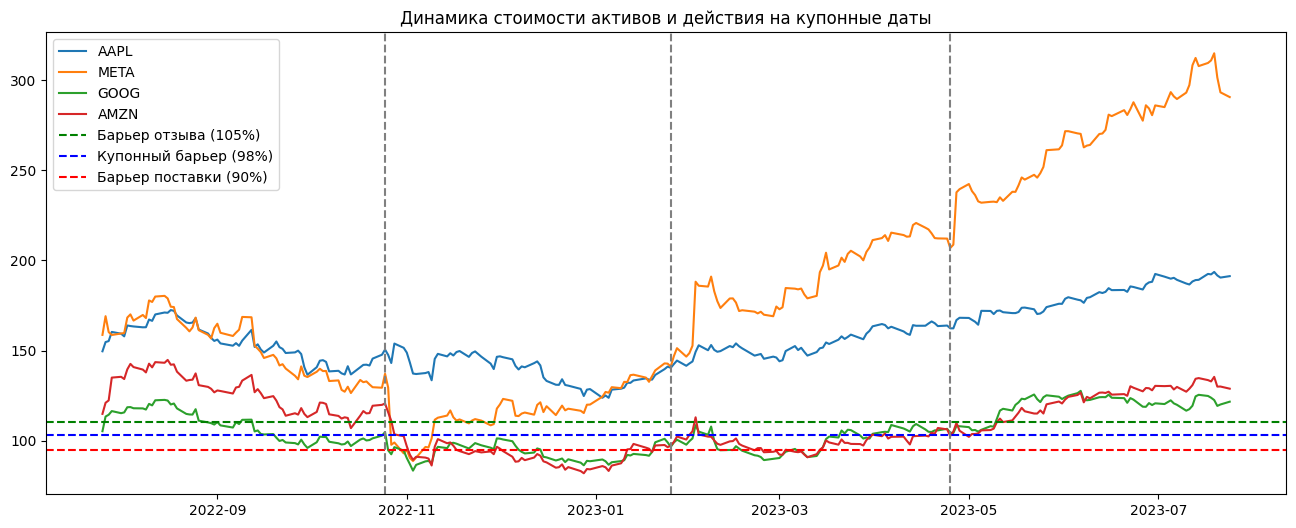

In [206]:
plt.figure(figsize=(16, 6))

for ticker in tickers:
    plt.plot(stock_data.index, stock_data[ticker], label=ticker)

plt.axhline(y=call_barrier.min(), color='green', linestyle='--', label='Барьер отзыва (105%)')
plt.axhline(y=coupon_barrier.min(), color='blue', linestyle='--', label='Купонный барьер (98%)')
plt.axhline(y=delivery_barrier.min(), color='red', linestyle='--', label='Барьер поставки (90%)')

for date in observation_dates:
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--')

plt.title('Динамика стоимости активов и действия на купонные даты')
plt.legend()
plt.show()


In [207]:
results_avg = []
cumulative_coupon_avg = 0

for date in observation_dates:
    avg_asset_price = stock_data.loc[date].mean()
    
    if avg_asset_price >= call_barrier.mean():
        cumulative_coupon_avg += coupon_rate * nominal
        results_avg.append((date, "Досрочное погашение", cumulative_coupon_avg + nominal))
        break
    elif avg_asset_price >= coupon_barrier.mean():
        cumulative_coupon_avg += coupon_rate * nominal
        results_avg.append((date, "Выплата купона", cumulative_coupon_avg))
    else:
        results_avg.append((date, "Купон переносится", cumulative_coupon_avg))


if len(results_avg) < len(observation_dates):
    final_avg_price = stock_data.loc[end_date].mean()
    if final_avg_price >= delivery_barrier.mean():
        results_avg.append((end_date, "Погашение номинала", cumulative_coupon_avg + nominal))
    else:
        final_value_avg = final_avg_price
        results_avg.append((end_date, "Погашение поставкой (Average)", cumulative_coupon_avg + final_value_avg))

print("Результаты (Average-of Performance):")
for r in results_avg:
    print(r)


Результаты (Average-of Performance):
('2022-10-25', 'Купон переносится', 0)
('2023-01-25', 'Купон переносится', 0)
('2023-04-25', 'Досрочное погашение', 5250000.0)


In [208]:
results_worst = []
cumulative_coupon_worst = 0

for date in observation_dates:
    worst_asset_price = stock_data.loc[date].min()
    
    if worst_asset_price >= call_barrier.min():
        cumulative_coupon_worst += coupon_rate * nominal
        results_worst.append((date, "Досрочное погашение", cumulative_coupon_worst + nominal))
        break
    elif worst_asset_price >= coupon_barrier.min():
        cumulative_coupon_worst += coupon_rate * nominal
        results_worst.append((date, "Выплата купона", cumulative_coupon_worst))
    else:
        results_worst.append((date, "Купон переносится", cumulative_coupon_worst))

# Проверка на финальную дату
if len(results_worst) < len(observation_dates):
    final_worst_price = stock_data.loc[end_date].min()
    if final_worst_price >= delivery_barrier.min():
        results_worst.append((end_date, "Погашение номинала", cumulative_coupon_worst + nominal))
    else:
        final_value_worst = final_worst_price
        results_worst.append((end_date, "Погашение поставкой (Worst)", cumulative_coupon_worst + final_value_worst))

print("Результаты (Worst-of Performance):")
for r in results_worst:
    print(r)


Результаты (Worst-of Performance):
('2022-10-25', 'Выплата купона', 250000.0)
('2023-01-25', 'Купон переносится', 250000.0)
('2023-04-25', 'Купон переносится', 250000.0)


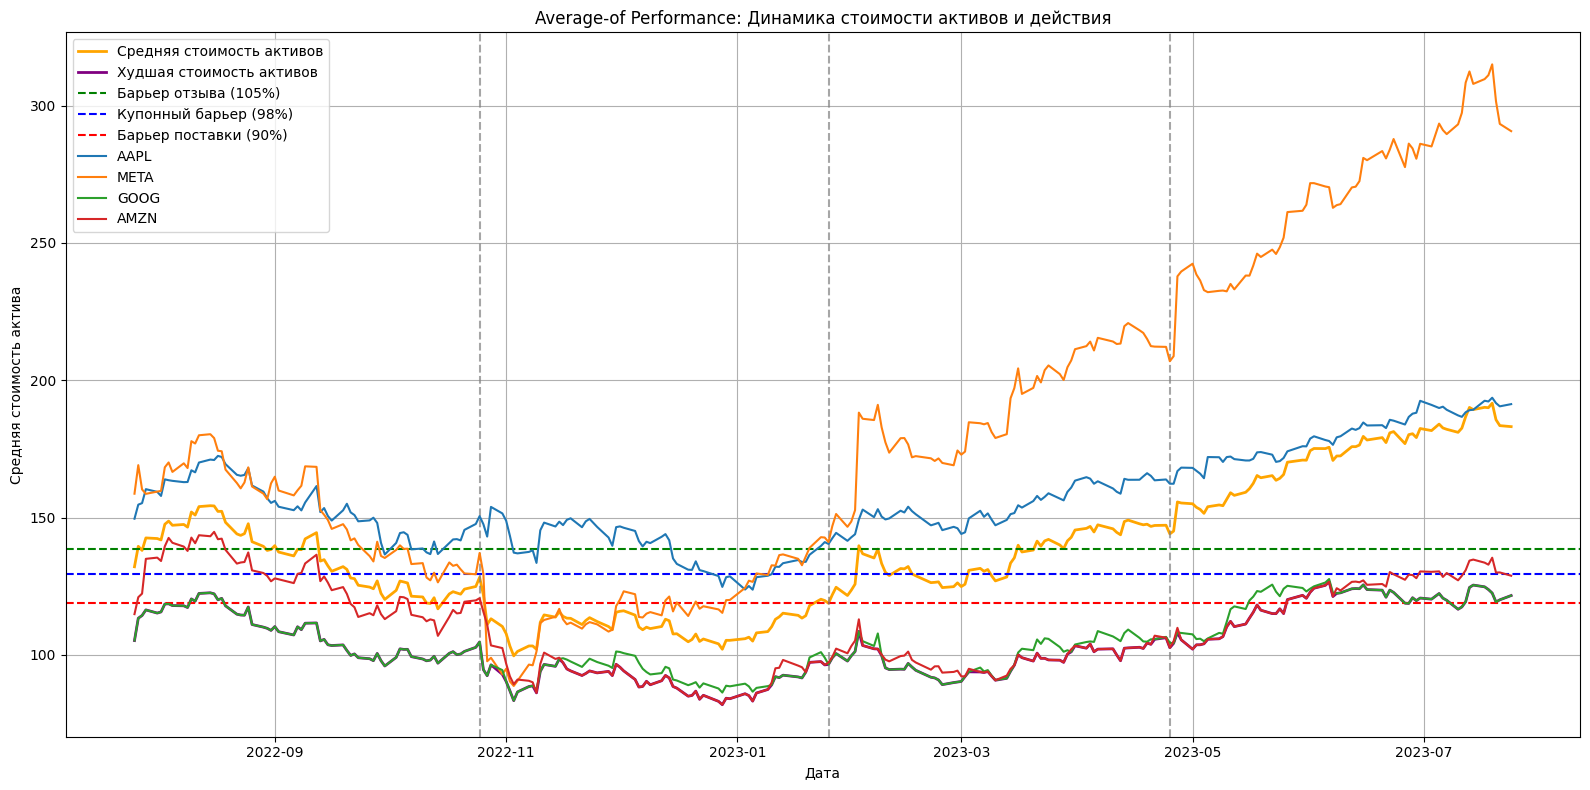

In [209]:
plt.figure(figsize=(16, 8))

average_performance = stock_data.mean(axis=1)
worst_performance = stock_data.min(axis=1)

plt.plot(stock_data.index, average_performance, label="Средняя стоимость активов", color='orange', linewidth=2)
plt.plot(stock_data.index, worst_performance, label="Худшая стоимость активов", color='purple', linewidth=2)

plt.axhline(y=call_barrier.mean(), color='green', linestyle='--', label='Барьер отзыва (105%)')
plt.axhline(y=coupon_barrier.mean(), color='blue', linestyle='--', label='Купонный барьер (98%)')
plt.axhline(y=delivery_barrier.mean(), color='red', linestyle='--', label='Барьер поставки (90%)')

for result in results_avg:
    date, action, value = result
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--', alpha=0.7)

for ticker in tickers:
    plt.plot(stock_data.index, stock_data[ticker], label=ticker)

plt.title('Average-of Performance: Динамика стоимости активов и действия')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость актива')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [221]:
lowest = (stock_data.loc[observation_dates[-1]] - stock_data.iloc[0]).sort_values().index[0]
diff = (stock_data.loc[observation_dates[-1]] - stock_data.iloc[0]).sort_values().values[0]

print(f'Наихудший актив {lowest} с падением в цене {diff} -- {abs(diff) / stock_data.loc[observation_dates[-1]]["AMZN"] * 100:.3f}%')

Наихудший актив AMZN с падением в цене -12.239997863769531 -- 11.933%


In [177]:
initial_investment = 5_000_000

In [191]:
coupon_rate = 0.20 / 4  
call_barrier = 1.05 
coupon_barrier = 0.98  
delivery_barrier = 0.90 

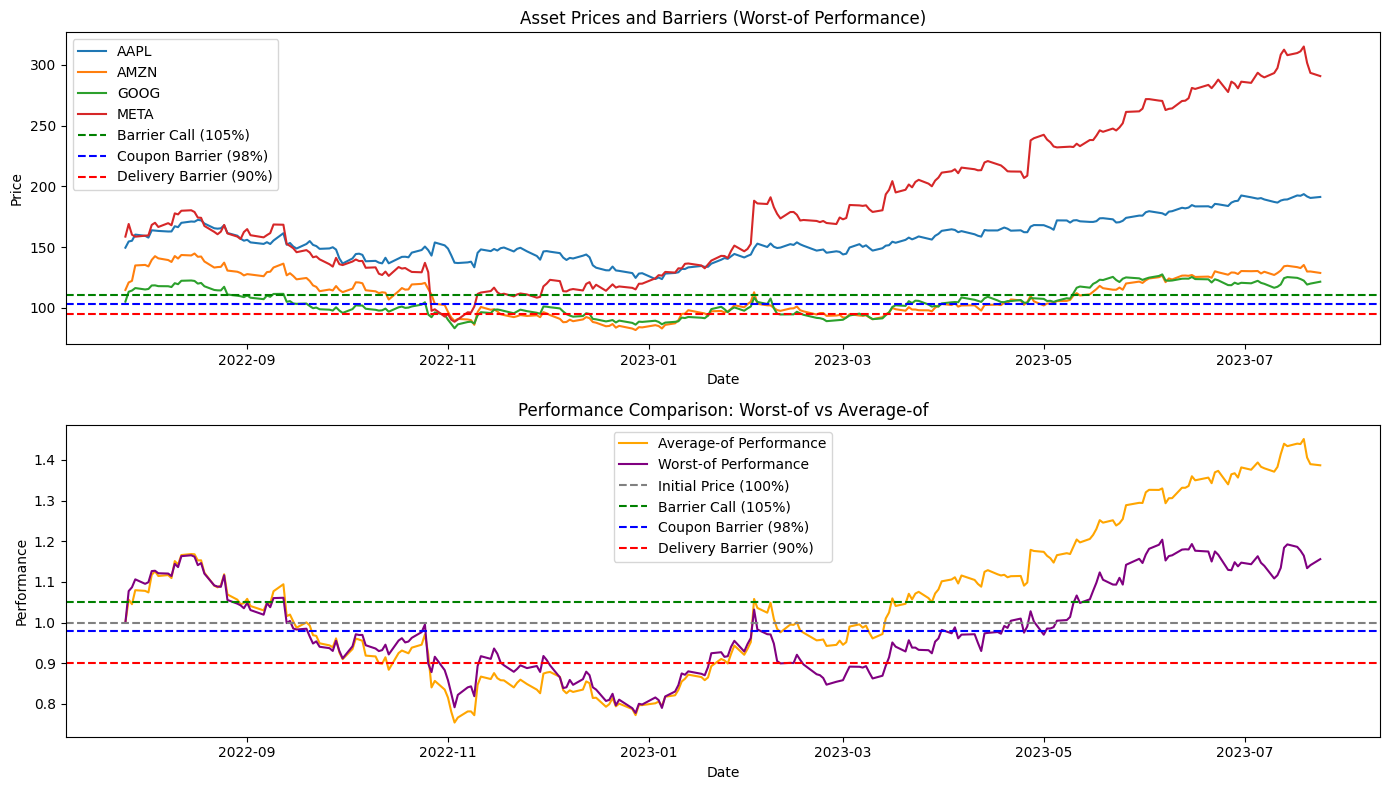

In [192]:
def performance_analysis(prices_df, initial_prices, method="worst-of"):
    results = []
    cumulative_coupon = 0.0

    if method == "average-of":
        performance = prices_df.mean(axis=1) / initial_prices.mean()
    else:  # worst-of
        performance = prices_df.min(axis=1) / initial_prices.min()

    for obs_date in observation_dates:
        perf = performance.loc[obs_date]

        if perf >= call_barrier:
            coupon = initial_investment * coupon_rate
            results.append((obs_date, "Early Redemption", coupon))
            cumulative_coupon += coupon
            break
        elif perf >= coupon_barrier:
            coupon = initial_investment * coupon_rate
            results.append((obs_date, "Coupon Paid", coupon))
            cumulative_coupon += coupon
        else:
            results.append((obs_date, "No Coupon", 0))
    else:
        final_perf = performance.iloc[len(performance) - 1]
        if final_perf >= delivery_barrier:
            results.append((end_date, "Maturity: Nominal Returned", initial_investment))
        else:
            delivery_value = final_perf * initial_investment
            results.append((end_date, "Maturity: Delivery Value", delivery_value))

    return pd.DataFrame(results, columns=["Date", "Action", "Amount"])



results_worst_df = performance_analysis(stock_data, initial_prices, method="worst-of")
results_avg_df = performance_analysis(stock_data, initial_prices, method="average-of")



def plot_results(prices_df, initial_prices, barrier_call, coupon_barrier, delivery_barrier):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    for col in prices_df.columns:
        plt.plot(prices_df.index, prices_df[col], label=col)
    plt.axhline(y=initial_prices.min() * barrier_call, color="green", linestyle="--", label="Barrier Call (105%)")
    plt.axhline(y=initial_prices.min() * coupon_barrier, color="blue", linestyle="--", label="Coupon Barrier (98%)")
    plt.axhline(y=initial_prices.min() * delivery_barrier, color="red", linestyle="--", label="Delivery Barrier (90%)")
    plt.title("Asset Prices and Barriers (Worst-of Performance)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    plt.subplot(2, 1, 2)
    avg_perf = prices_df.mean(axis=1) / initial_prices.mean()
    worst_perf = prices_df.min(axis=1) / initial_prices.min()
    plt.plot(avg_perf.index, avg_perf, label="Average-of Performance", color="orange")
    plt.plot(worst_perf.index, worst_perf, label="Worst-of Performance", color="purple")
    plt.axhline(y=1, color="gray", linestyle="--", label="Initial Price (100%)")
    plt.axhline(y=barrier_call, color="green", linestyle="--", label="Barrier Call (105%)")
    plt.axhline(y=coupon_barrier, color="blue", linestyle="--", label="Coupon Barrier (98%)")
    plt.axhline(y=delivery_barrier, color="red", linestyle="--", label="Delivery Barrier (90%)")
    plt.title("Performance Comparison: Worst-of vs Average-of")
    plt.xlabel("Date")
    plt.ylabel("Performance")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(stock_data, initial_prices, call_barrier, coupon_barrier, delivery_barrier)